<a href="https://colab.research.google.com/github/uzimanoko/manoko/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


# ***Reading The Dataset***

In [ ]:
# Uploading and reading the dataset
df = pd.read_csv("/content/bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
# Basic stats about the data
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
# Checking many features within the dataset are categorical and how many are numerical
cat_list = list(df.select_dtypes(include = 'O').columns)
num_list = list(df.select_dtypes(exclude = 'O').columns)
print(f"All features: {df.shape[1]}")
print(f"Categorical: {len(cat_list)}")
print(f"Numeric: {len(num_list)}")

All features: 15
Categorical: 0
Numeric: 15


# ***Data Preparation***

In [ ]:
# Converting the following features to SI units to compute the BMI

df['Weight'] /= 2.205 # converting to kilogram(kg)
df['Height'] /= 39.37 # converting to meters(m)

df['BMI'] = df['Weight'] / df['Height'] ** 2   # creating BMI

# Rounding the value to 2 decimal
df['Weight'] = round(df['Weight'], 2)
df['Height'] = round(df['Height'], 2)
df['BMI'] = round(df['BMI'], 2)

In [ ]:
# Creating the target column
df["Obesity"] = np.where(df["BodyFat"] >= 25, 1, 0)

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,Obesity
0,1.0708,12.3,23,69.95,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.62,0
1,1.0853,6.1,22,78.57,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.33,0
2,1.0414,25.3,22,69.84,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.66,1
3,1.0751,10.4,26,83.79,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.88,0
4,1.0340,28.7,24,83.56,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.51,1


# ***Exploratory Data Analysis***

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64


<Axes: xlabel='BodyFat', ylabel='Count'>

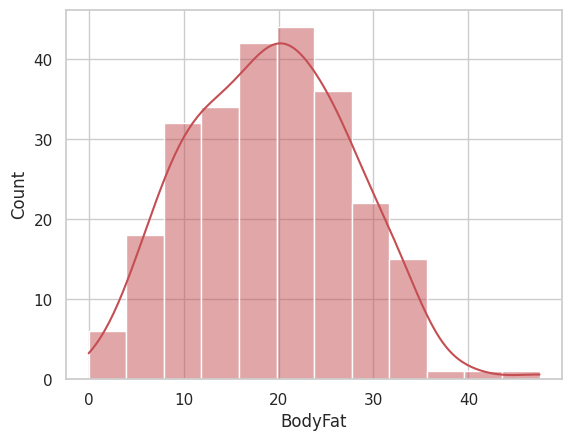

In [ ]:
# Distribution of the BodyFat column within our dataset

print(df['BodyFat'].describe())
sns.histplot(data=df, x=df["BodyFat"], kde=True, color='r')

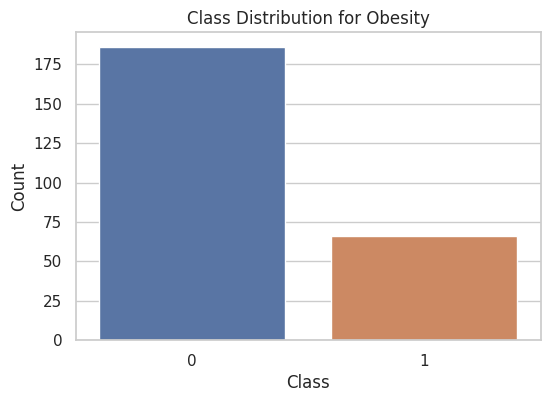

In [ ]:
# Counting the number of obese and not obese target values in the dataset
class_labels = ['Not Obese', 'Obese','Maybe']
class_counts = df["Obesity"].value_counts()

# Creating a bar plot for the counts
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution for Obesity')


plt.show()


array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'BodyFat'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>],
       [<Axes: title={'center': 'Hip'}>,
        <Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>],
       [<Axes: title={'center': 'Biceps'}>,
        <Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Obesity'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

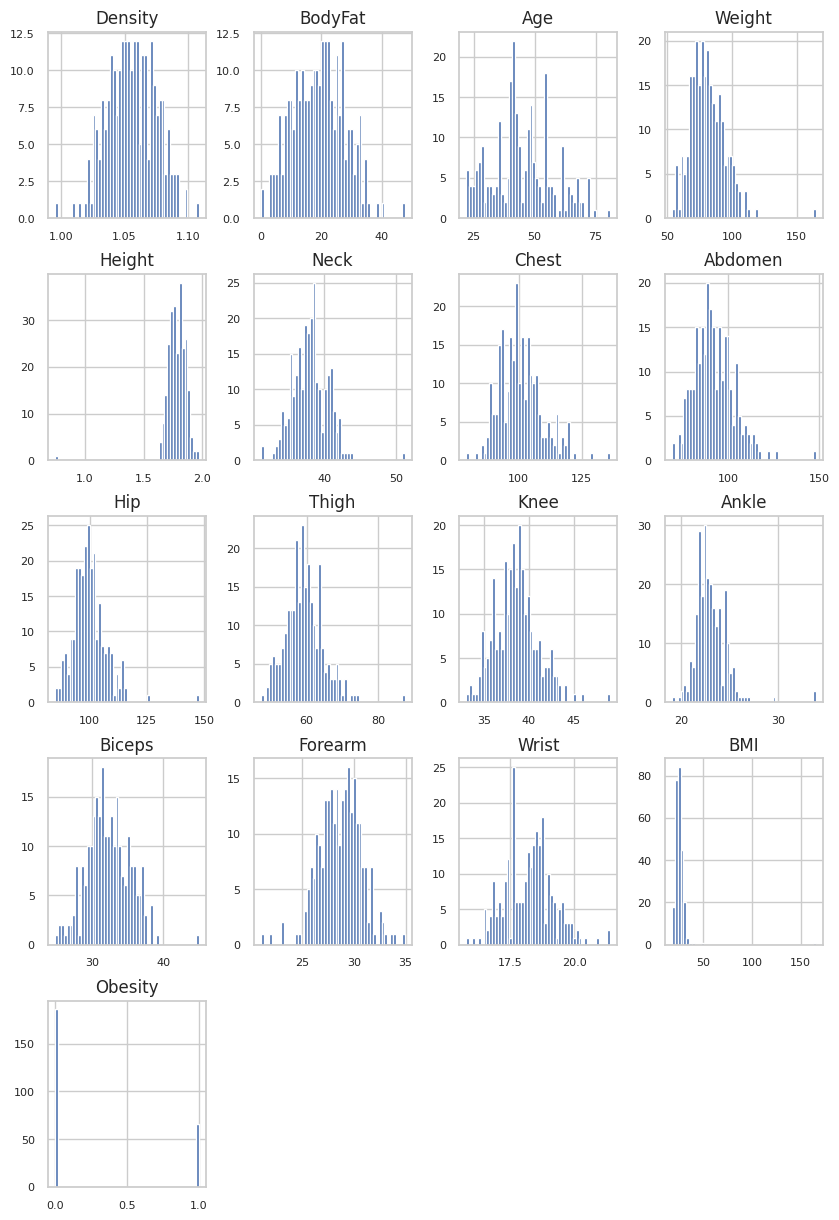

In [ ]:
# Distribution of the features within the dataset

df.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Finding correlation between BodyFat and the features in the dataset
df_corr = df.corr()['BodyFat']
# Removing the body fat column
del df_corr["BodyFat"]
# creating a list of strongly correlated features
good_features = df_corr[df_corr > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with BodyFat:\n{}".format(len(good_features), good_features))

There is 7 strongly correlated values with BodyFat:
Abdomen    0.813432
Obesity    0.752490
Chest      0.702620
Hip        0.625201
Weight     0.612411
Thigh      0.559608
Knee       0.508665
Name: BodyFat, dtype: float64


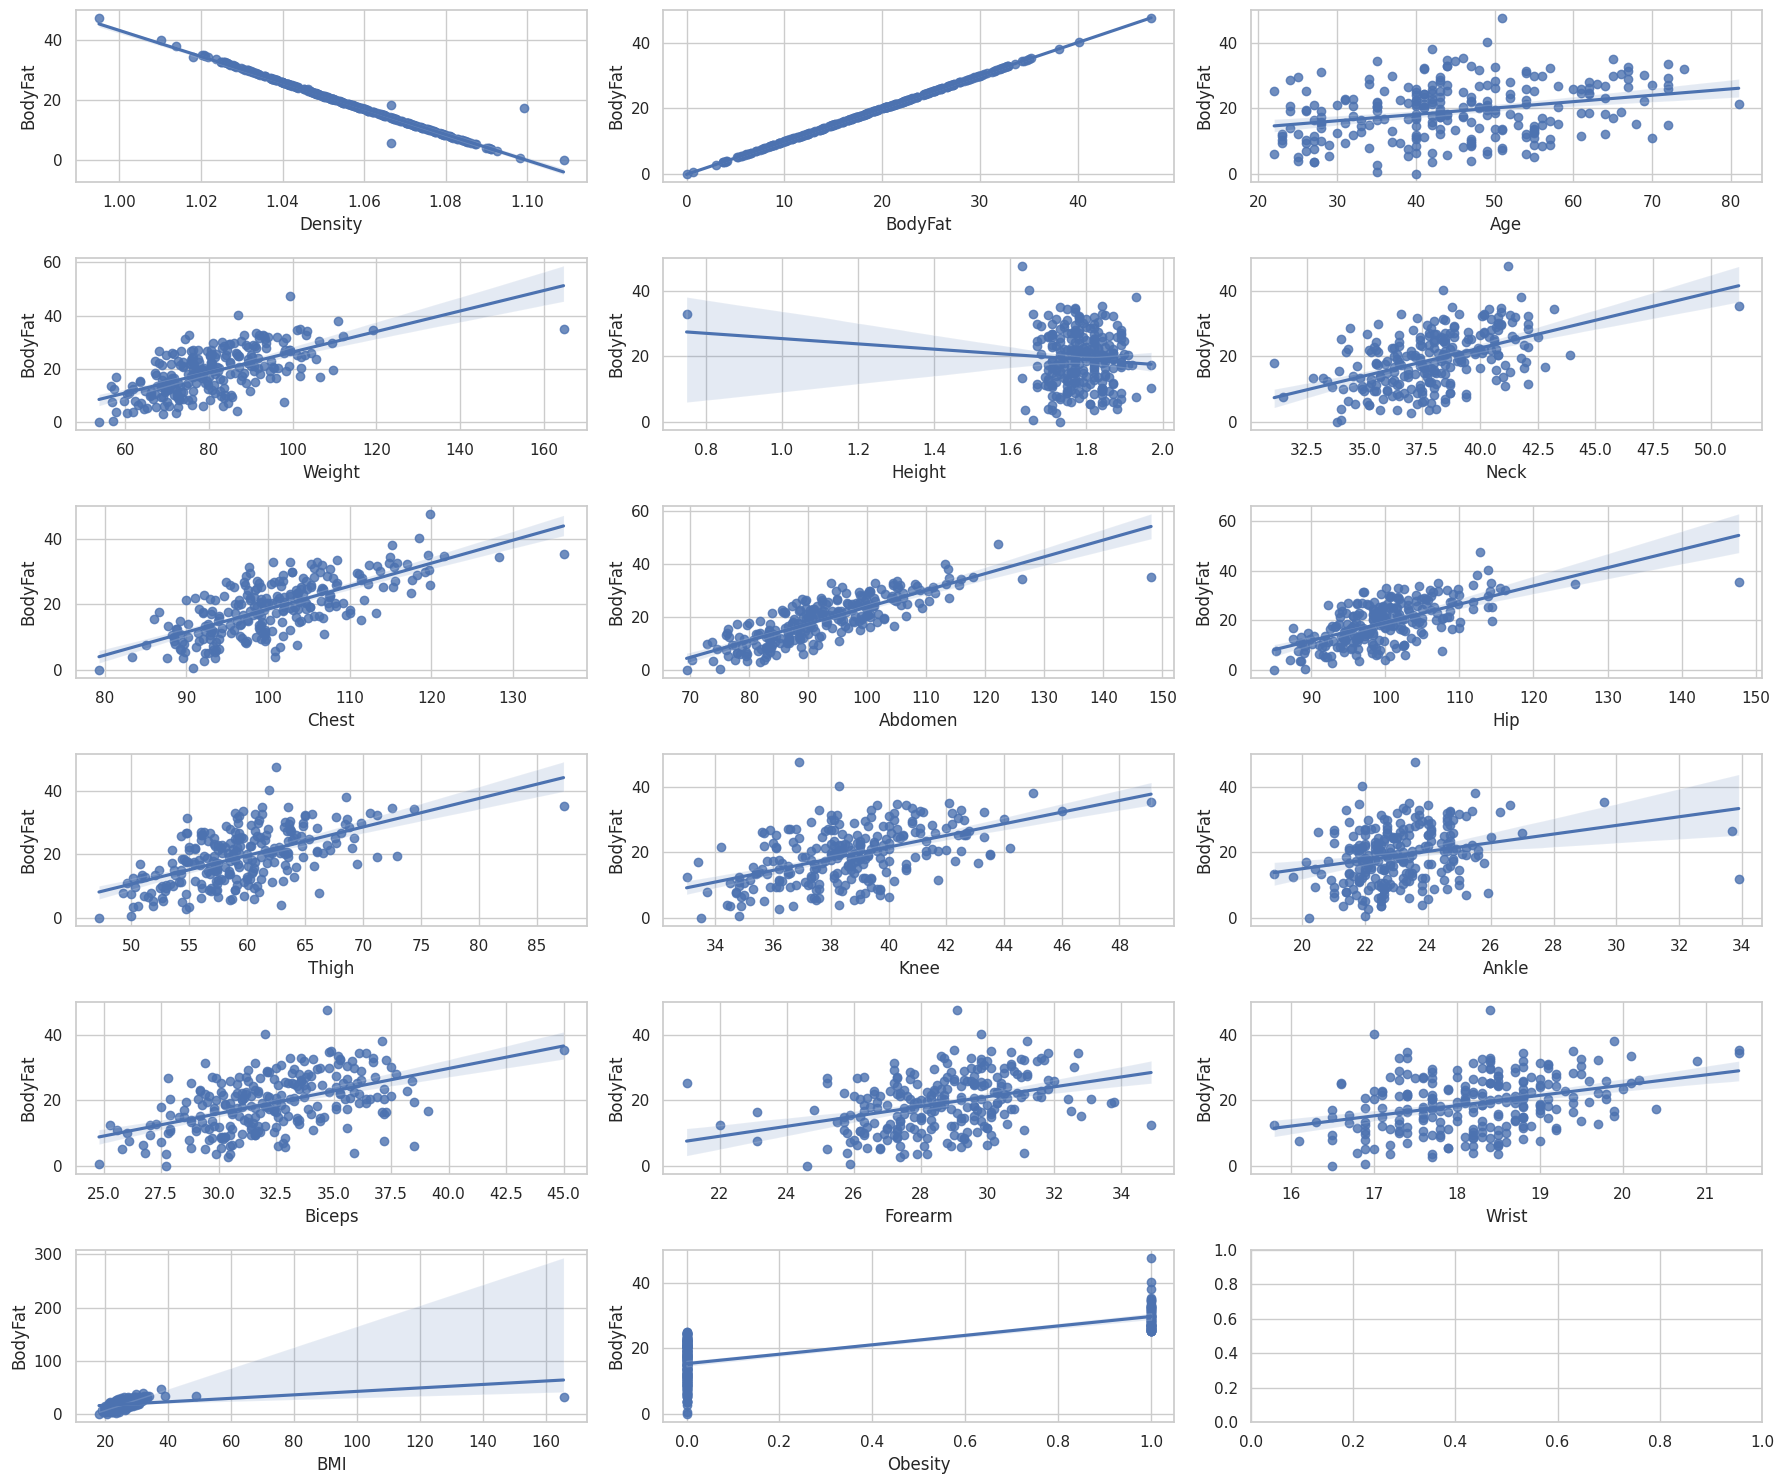

In [ ]:
# Plotting the features in order to inspect outliers as they have the potential to hinder good features as well

fig, axes = plt.subplots(round(len(df.columns) / 3), 3, figsize=(18, 15))

for i, ax in enumerate(axes.flat):
    if i < len(df.columns):
        column_name = df.columns[i]
        sns.regplot(x=column_name, y='BodyFat', data=df, ax=ax)
        ax.set_xlabel(column_name)
        ax.set_ylabel('BodyFat')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Removing outliers from each column using the z-score.
# Calculate z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a z-score threshold for outlier detection (3 is normally the threshold for outliers)
z_threshold = 3

# Filter out rows where any column's z-score exceeds the threshold
outliers_removed_df = df[(z_scores < z_threshold).all(axis=1)]

# creating a new dataframe without the outliers
outliers_removed_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,Obesity
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.056301,18.820248,44.785124,80.531612,1.787066,37.911157,100.452066,92.016529,99.491322,59.212810,38.528926,22.974380,32.211983,28.680579,18.208264,25.183595,0.243802
std,0.018412,8.058765,12.601921,11.820919,0.066289,2.246639,7.805558,9.706193,6.080037,4.778883,2.244234,1.310287,2.886623,1.892372,0.876203,3.110187,0.430264
min,1.010100,0.000000,22.000000,53.740000,1.630000,31.100000,79.300000,69.400000,85.000000,47.200000,33.400000,19.100000,24.800000,23.100000,16.100000,18.010000,0.000000
25%,1.042400,12.400000,35.250000,71.882500,1.732500,36.400000,94.250000,84.525000,95.500000,56.025000,37.025000,22.000000,30.200000,27.300000,17.600000,23.030000,0.000000
50%,1.055050,19.150000,43.000000,79.820000,1.780000,37.950000,99.600000,90.900000,99.250000,58.950000,38.450000,22.750000,31.950000,28.700000,18.300000,24.925000,0.000000
75%,1.070475,24.875000,54.000000,88.862500,1.840000,39.400000,105.175000,98.875000,103.075000,62.100000,39.875000,23.900000,34.100000,30.000000,18.800000,27.207500,0.000000
max,1.108900,40.100000,81.000000,112.130000,1.970000,43.900000,121.600000,118.000000,116.100000,74.400000,45.000000,27.000000,39.100000,33.800000,20.900000,33.880000,1.000000


In [ ]:
# Finding more features that correlate to bodyfat after removing the outliers
df_new_corr = outliers_removed_df.corr()['BodyFat']
# removing bodyfat
del df_new_corr["BodyFat"]
# recreating another list with old and new strongly corelated features after removing outliers
new_good_features = df_new_corr[df_new_corr >= 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with BodyFat:\n{}".format(len(new_good_features), new_good_features))

There is 8 strongly correlated values with BodyFat:
Abdomen    0.816194
Obesity    0.736325
BMI        0.727211
Chest      0.684386
Hip        0.617246
Weight     0.602296
Thigh      0.541309
Knee       0.505489
Name: BodyFat, dtype: float64


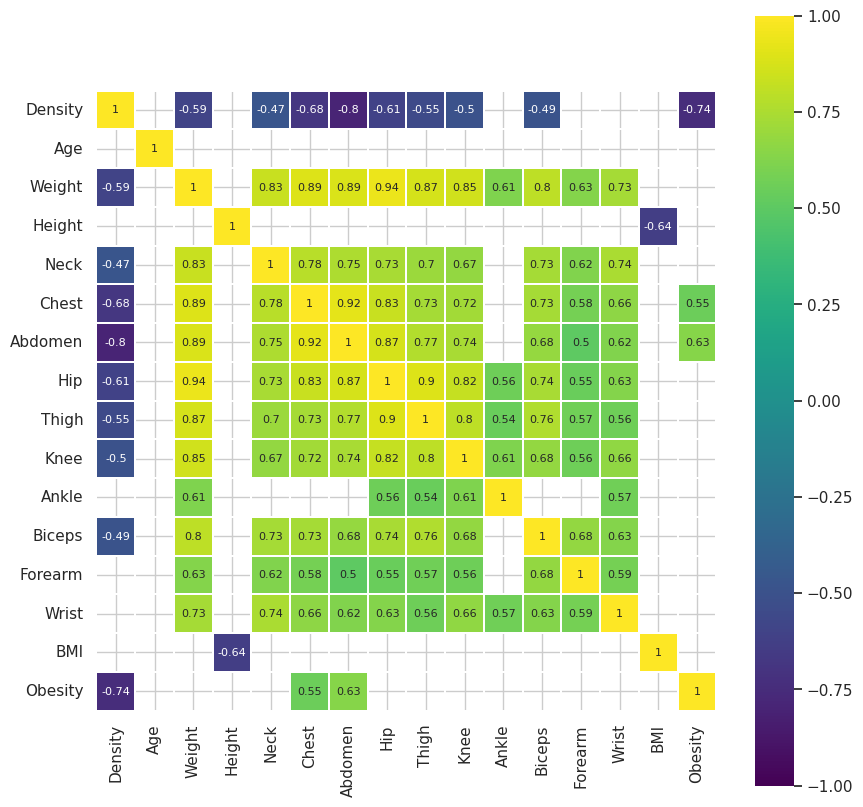

In [ ]:
# Feature to feature relationships plot

corr = df.drop('BodyFat', axis=1).corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

# ***Data Preprocessing***

In [ ]:
# In preperation for the machine learning model, we'll continue with the dataset without the outliers as created eariler.
final_df = outliers_removed_df

In [ ]:
# checkin for any null values in the code
print("Total null values at each column: \n", final_df.isnull().sum())

Total null values at each column: 
 Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
BMI        0
Obesity    0
dtype: int64


# ***Training The Model***

In [ ]:
# creating a dataframe with strongly corelated features which were found using corelation analysis
selected_features = ['Abdomen', 'BMI', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee']
features = outliers_removed_df[selected_features]
features.head()

,Abdomen,BMI,Chest,Hip,Weight,Thigh,Knee
0,85.2,23.62,93.1,94.5,69.95,59.0,37.3
1,83.0,23.33,93.6,98.7,78.57,58.7,37.3
2,87.9,24.66,95.8,99.2,69.84,59.6,38.9
3,86.4,24.88,101.8,101.2,83.79,60.1,37.3
4,100.0,25.51,97.3,101.9,83.56,63.2,42.2


In [ ]:
# We will create two models, one using strongly corelated features and another one using l1 regularization, then compare the results

# setting the features for the logistic regression model with l1 regularization using the dataset without outliers
X_lasso = final_df.iloc[:, :16]
y_lasso = final_df.iloc[:, 16]

# # setting the features for the logistic regression model using the dataset without outliers
X = features.iloc[:, :7]
y = final_df.iloc[:, 16]

# Split the data into training and testing sets for the logistic regression model with l1
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.3, random_state=42)

# Split the data into training and testing sets for the  logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for logistic regression model with L1
scaler = StandardScaler()
X_train_lasso_sc = scaler.fit_transform(X_train_lasso)
X_test_lasso_sc = scaler.transform(X_test_lasso)

# Standardize the features Logistic regression model
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [ ]:
# Training the logistic regression model with l1
lasso_model = LogisticRegression(penalty="l1",solver="liblinear", max_iter=1500, random_state=42)
lasso_model.fit(X_train_lasso_sc, y_train)

# Training the logistic regression model
model = LogisticRegression(solver="liblinear", max_iter=1500, random_state=42)
model.fit(X_train_sc, y_train)

LogisticRegression(max_iter=1500, random_state=42, solver='liblinear')

## **Feature Selection with L1 Regularization**

In [ ]:
# The feature selection done by the logistic regression model with L1

non_zero_coeffs = np.sum(model.coef_ != 0)
print(f'Number of non-zero coefficients: {non_zero_coeffs}')

# Get the coefficients of the model
coefficients = model.coef_

# Print the coefficients for each feature
feature_names = final_df.columns
for feature, coef in zip(feature_names, coefficients[0]):
    print(f'{feature}: {coef:.4f}')

Number of non-zero coefficients: 7
Density: 2.3974
BodyFat: 1.2415
Age: 0.3227
Weight: -0.1005
Height: -1.7093
Neck: -0.2923
Chest: 0.0242


In [ ]:
# Predicting the target using the Logistic Regression with l1 regularization
y_pred_lasso = lasso_model.predict(X_test_lasso_sc)
# Predicting the target using the Logistic Regression
y_pred = model.predict(X_test_sc)

# ***Model Evaluation***

In [ ]:
Model_performance = classification_report(y_test, y_pred)
print(f"The report for the Logistic Regression Model: \n{Model_performance}")

lasso_Model_performance = classification_report(y_test_lasso, y_pred_lasso)
print(f"The report for the Logistic Regression Model with l1 Regularization: \n{lasso_Model_performance}")

The report for the Logistic Regression Model: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.79      0.61      0.69        18

    accuracy                           0.86        73
   macro avg       0.83      0.78      0.80        73
weighted avg       0.86      0.86      0.86        73

The report for the Logistic Regression Model with l1 Regularization: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.94      0.94      0.94        18

    accuracy                           0.97        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.97      0.97      0.97        73



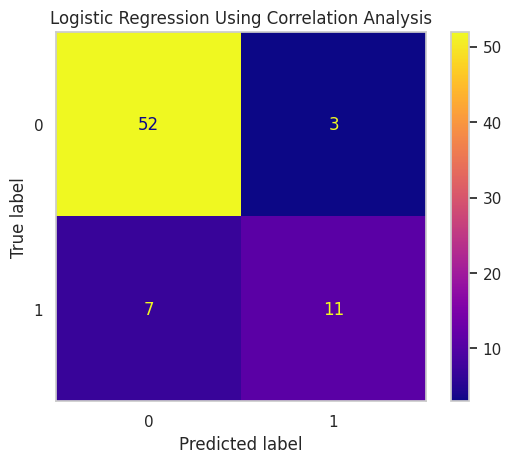

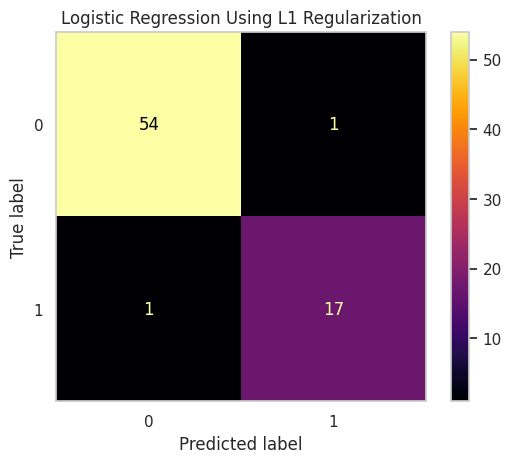

In [ ]:
# Plot the confusion matrix for Logistic Regression
cm1 = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp.plot(cmap=plt.cm.plasma)
plt.title('Logistic Regression Using Correlation Analysis')
disp.ax_.grid(False)
plt.show()

# Plot the confusion matrix for Logistic Regression Using L1 Regularization
cm2 = confusion_matrix(y_test_lasso, y_pred_lasso, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
disp.plot(cmap=plt.cm.inferno)
plt.title('Logistic Regression Using L1 Regularization')
disp.ax_.grid(False)
plt.show()

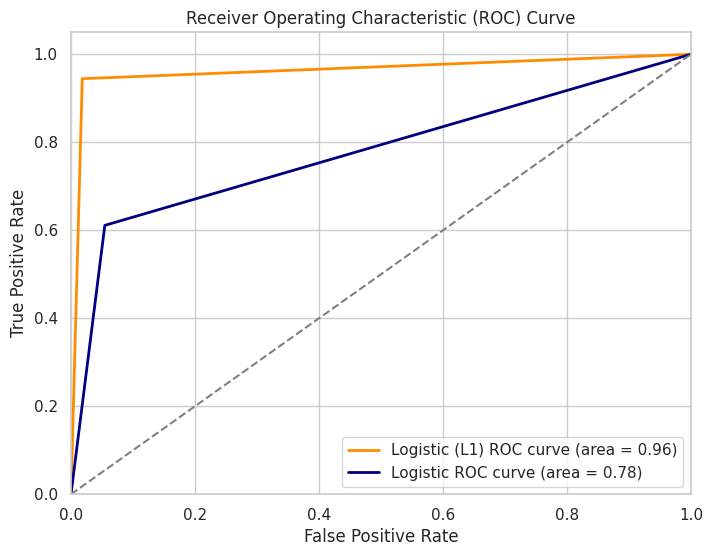

ROC AUC for Logisic Regression Model: 0.7783
ROC AUC  for Logisic Regression Model with l1 Regularization: 0.9631


In [ ]:
True_positive_rate = recall_score(y_test, y_pred)
False_positive_rate = cm1[0,1]/(cm1[0,1]+cm1[0,0])

True_positive_rate_lasso = recall_score(y_test_lasso, y_pred_lasso)
False_positive_rate_lasso = cm2[0,1]/(cm2[0,1]+cm2[0,0])

# Calculate ROC curves for both models
False_positive_rate_lasso, True_positive_rate_lasso, _ = roc_curve(y_test_lasso, y_pred_lasso, pos_label=1)
False_positive_rate, True_positive_rate, _ = roc_curve(y_test, y_pred, pos_label=1)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve for the Logistic Regression with L1
plt.plot(False_positive_rate_lasso, True_positive_rate_lasso, color='darkorange', lw=2, label='Logistic (L1) ROC curve (area = {:.2f})'.format(roc_auc_score(y_test_lasso, y_pred_lasso)))

# Plot the ROC curve for the Logistic Regression without L1
plt.plot(False_positive_rate, True_positive_rate, color='navy', lw=2, label='Logistic ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred)))

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Area under the curve (AUC) for both models
ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC_lasso = roc_auc_score(y_test_lasso, y_pred_lasso)
print('ROC AUC for Logisic Regression Model: {:.4f}'.format(ROC_AUC))
print('ROC AUC  for Logisic Regression Model with l1 Regularization: {:.4f}'.format(ROC_AUC_lasso))


# ***Hyper-parameter Tuning***

In [ ]:
# We used the better model after evaluation to further improve it
# Define hyperparameters for tuning
param_grid = {
    'penalty': ['l1'],  # Use L1 regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength (inverse of lambda)
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='accuracy', cv=5)


In [ ]:
# Fit the grid search to your data
grid_search.fit(X_train_lasso_sc, y_train_lasso)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_tuned = best_model.predict(X_test_lasso_sc)

In [ ]:
# Print the best hyperparameters and evaluate the tuned model
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:",'\n', classification_report(y_test_lasso, y_pred_tuned))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1'}
Accuracy on Test Data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        18

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

